# Part I (75 points):  Apply Machine Learning approaches on MNIST Handwritten Digit Dataset

Task 5: (20 points) Apply principal component analysis on dataset

In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import time
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_val, y_train_val) ,(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_valid = []
y_valid = []
X_train = []
y_train = []
i = 1
for x,y in zip(X_train_val, y_train_val):
  if i%12 ==0:
    X_valid.append(x)
    y_valid.append(y)
  else:
    X_train.append(x)
    y_train.append(y)
  i = i+1
X_valid = np.array(X_valid, np.float32)
y_valid = np.array(y_valid)
X_train = np.array(X_train, np.float32)
y_train = np.array(y_train)
X_test = np.array(X_test, np.float32)

Task 5.1: Apply PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95% (Refer to steps in Textbook: P219-223, or steps in Week6-Lab I: Dimension_Reduction). Print the shape of the new training, validation, and test set.

In [4]:
#PCA dimensionality reduction
X_train , X_valid , X_test = X_train.reshape([-1,28*28]) , X_valid.reshape([-1,28*28]) , X_test.reshape([-1,28*28])
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_valid = pca.transform(X_valid)
X_test = pca.transform(X_test)

In [5]:
#Print the shape of the new training, validation, and test set.
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(55000, 154)
(5000, 154)
(10000, 154)


Task 5.2: Train all ML methods in Task 4 on the new reduced dataset to summarize the classification accuracy into the following table (Pandas dataframe is recommended)

In [6]:
x_train = preprocessing.scale(X_train)  # Implement standardization
x_valid = preprocessing.scale(X_valid)
x_test = preprocessing.scale(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and mig

In [7]:
#SoftMax Regression
w = tf.Variable(tf.cast(np.random.randn(154,10)*0.001,tf.float32),name="weight") 
b = tf.Variable(tf.cast(np.random.randn(10),tf.float32),name="bias")
learning_rate = 0.1
step = 2000
batch_size = 256
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)
def logistic_f(x): 
  z = tf.matmul(x,w)+b
  y = tf.nn.softmax(z)
  return y
def loss_f(y_pred, y_true):   
  y_true = tf.one_hot(y_true, depth=10)
  term1 = -y_true*tf.math.log(y_pred)
  loss = tf.reduce_mean(tf.reduce_sum(term1,1))
  return loss
optimizer = tf.optimizers.SGD(learning_rate) 
def run_optimizer(x,y):
    with tf.GradientTape() as g:
        pred = logistic_f(x)
        loss = loss_f(pred,y)
    gradients = g.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients,[w,b]))
def accuracy(y_pred,y_true):  
    y_pred = tf.argmax(y_pred,1)
    y_true = tf.cast(y_true, y_pred.dtype)
    correct = tf.equal(y_pred, y_true)
    correct = tf.cast(correct, tf.float32)
    accuracy = tf.reduce_mean(correct)
    return accuracy

all_loss = []
all_acc = []
start = time.time()
for i, (batch_x, batch_y) in enumerate(train_data.take(step), 1):
  run_optimizer(batch_x, batch_y)
  if i % 50 == 0:
    pred = logistic_f(batch_x)
    loss = loss_f(pred, batch_y)
    all_loss.append(loss)
    acc = accuracy(pred, batch_y)
    all_acc.append(acc)
    print("step: %i, loss: %f, accuracy: %f" % (i, loss, acc))
end = time.time()
print("Training time:{}".format(end-start))  

step: 50, loss: 1.153609, accuracy: 0.691406
step: 100, loss: 0.705379, accuracy: 0.859375
step: 150, loss: 0.676667, accuracy: 0.847656
step: 200, loss: 0.526628, accuracy: 0.882812
step: 250, loss: 0.461923, accuracy: 0.882812
step: 300, loss: 0.409319, accuracy: 0.898438
step: 350, loss: 0.443269, accuracy: 0.875000
step: 400, loss: 0.354654, accuracy: 0.910156
step: 450, loss: 0.357717, accuracy: 0.914062
step: 500, loss: 0.467080, accuracy: 0.875000
step: 550, loss: 0.377298, accuracy: 0.906250
step: 600, loss: 0.402016, accuracy: 0.886719
step: 650, loss: 0.267679, accuracy: 0.960938
step: 700, loss: 0.324244, accuracy: 0.917969
step: 750, loss: 0.349087, accuracy: 0.906250
step: 800, loss: 0.304831, accuracy: 0.917969
step: 850, loss: 0.339511, accuracy: 0.906250
step: 900, loss: 0.345502, accuracy: 0.902344
step: 950, loss: 0.380360, accuracy: 0.871094
step: 1000, loss: 0.299945, accuracy: 0.917969
step: 1050, loss: 0.296457, accuracy: 0.917969
step: 1100, loss: 0.246427, accur

Task 4.3: Calculate the overall accuracy of the predictions over training set, validation set and test set.

In [8]:

train_pred = logistic_f(x_train)
acc = accuracy(train_pred, y_train)
print("training dataset acc:{}".format(acc))
valid_pred = logistic_f(x_valid)
acc = accuracy(valid_pred, y_valid)
print("Validation dataset acc:{}".format(acc))
test_pred = logistic_f(x_test)
acc = accuracy(test_pred, y_test)
print("Testing dataset acc:{}".format(acc))

training dataset acc:0.9160181879997253
Validation dataset acc:0.9258000254631042
Testing dataset acc:0.9160000085830688


In [10]:
def class_accuracy(y_pred,y_true):  
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  y_pred = tf.argmax(y_pred,1)
  y_true = tf.cast(y_true, y_pred.dtype)
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc


In [11]:

acc = class_accuracy(train_pred,y_train)  
print(acc)
acc = class_accuracy(valid_pred,y_valid)  
print(acc)
acc = class_accuracy(test_pred,y_test)  
print(acc)

[0.9654088050314465, 0.9687197678168333, 0.8927404718693285, 0.885284101093386, 0.9296904140246177, 0.8675937122128174, 0.9567935282220996, 0.9286087410760926, 0.8614548181477315, 0.8921837818048691]
[0.9671179883945842, 0.9722222222222222, 0.8816964285714286, 0.9021739130434783, 0.9458333333333333, 0.8627450980392157, 0.9770354906054279, 0.946360153256705, 0.8762088974854932, 0.9176954732510288]
[0.9734693877551021, 0.973568281938326, 0.8914728682170543, 0.9, 0.9327902240325866, 0.8632286995515696, 0.94258872651357, 0.9134241245136187, 0.8675564681724846, 0.8909811694747275]


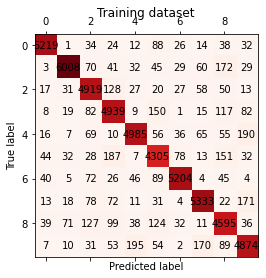

In [12]:

C = confusion_matrix(list(tf.argmax(train_pred,1)), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

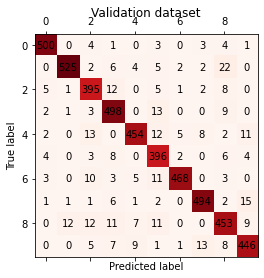

In [13]:

C = confusion_matrix(list(tf.argmax(valid_pred,1)), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

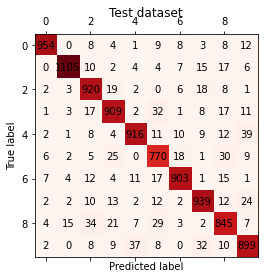

In [14]:

C = confusion_matrix(list(tf.argmax(test_pred,1)), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Task 4.6: Save the trained model to disk.

In [15]:
def save_model(filename, w): 
  m = np.shape(w)[0]
  f_w = open(filename, 'w')
  w_array = []
  for i in range(m):
      w_array.append(str(w[i, 0]))
  f_w.write('\t'.join(w_array))
  f_w.close()
save_model('SoftMax_Regression_weights',w)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=10)

In [17]:

train_pred = knn.predict(x_train)
acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

training dataset acc:0.9083272727272728


In [18]:

valid_pred = knn.predict(x_valid)
acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

Validation dataset acc:0.9206


In [19]:

test_pred = knn.predict(x_test)
acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

Testing dataset acc:0.8813


In [20]:
def class_accuracy(y_pred,y_true): 
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

In [21]:

acc = class_accuracy(train_pred,y_train)  
print(acc)
acc = class_accuracy(valid_pred,y_valid)  
print(acc)
acc = class_accuracy(test_pred,y_test)  
print(acc)

[0.9903810580836108, 0.9974201870364399, 0.8406533575317604, 0.9053593834020434, 0.8856769861991795, 0.8726320032245063, 0.9681926824783967, 0.949503743687968, 0.7349081364829396, 0.9183598755262676]
[0.988394584139265, 0.9981481481481481, 0.8683035714285714, 0.8894927536231884, 0.9166666666666666, 0.9193899782135077, 0.9770354906054279, 0.9712643678160919, 0.7640232108317214, 0.9074074074074074]
[0.986734693877551, 0.9964757709251101, 0.7926356589147286, 0.8722772277227723, 0.845213849287169, 0.8307174887892377, 0.9634655532359081, 0.9280155642023347, 0.6848049281314168, 0.8929633300297324]


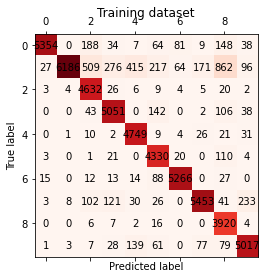

In [22]:

C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

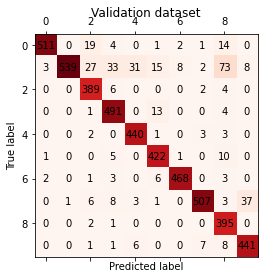

In [23]:

C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

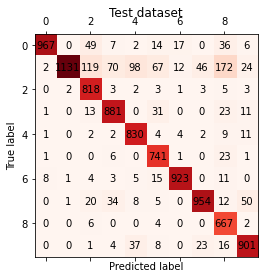

In [24]:

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
joblib.dump(knn,'./knn')  

['./knn']

In [26]:

# Sigmoid
class SigmoidActivator(object):
    def forward(self, weighted_input):
        return 1.0 / (1.0 + np.exp(-weighted_input))

    def backward(self, output):
        return np.multiply(output, (1 - output)) 

# softmax
class SoftmaxActivator(object):
    def forward(self, weighted_input):  
        exps = np.exp(weighted_input - np.max(weighted_input))
        return exps / np.sum(exps)

    def backward(self, output): 
        return 1
        
def one_hot(j):  
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

class FullConnectedLayer(object):
    def __init__(self, input_size, output_size, activator=None, learning_rate=None):
        self.input_size = input_size
        self.output_size = output_size
        self.activator = activator
      
        self.W = np.random.randn(output_size,input_size)
       
        self.b = np.random.randn(output_size,1)
        
        self.learning_rate = learning_rate
       
        self.output = np.zeros((output_size, 1))  
    def forward(self, input_array):
        self.input = input_array
        self.output = self.activator.forward(np.dot(self.W, input_array) + self.b)
        return self.output

    def backward(self, delta_array):
        self.delta = np.multiply(self.activator.backward(self.output), delta_array)
        self.W_grad = np.dot(self.delta, self.input.T)
        self.b_grad = self.delta

    
    def update(self):
        self.W -= self.learning_rate * self.W_grad
        self.b -= self.learning_rate * self.b_grad

class Network(object):
   
    def __init__(self,input=784,output=10,Activateor=SigmoidActivator()):
        self.fl1 = FullConnectedLayer(input, 32, Activateor, 0.001)
        self.fl2 = FullConnectedLayer(32, 16, Activateor, 0.001)
        self.fl3 = FullConnectedLayer(16, output,SoftmaxActivator(), 0.001)


    def forward(self, input):  
        x = self.fl1.forward(input)
        x = self.fl2.forward(x)
        x = self.fl3.forward(x)
        return x

    def backward(self, labels):  
        delta = self.fl3.output - labels
        self.fl3.backward(delta)
        self.fl2.backward(np.dot(self.fl3.W.T, self.fl3.delta))
        self.fl1.backward(np.dot(self.fl2.W.T, self.fl2.delta))

        self.fl3.update()
        self.fl2.update()
        self.fl1.update()
net = Network(154,10)
start = time.time()
for i in range(1,21):
  train_pred = []
  valid_pred = []
  loss = 0
  right = 0
  right2 = 0
  for x,y in list(zip(x_train,y_train)):
    x = x.reshape(154,1)
    pretict = net.forward(x)
    net.backward(one_hot(y))
    loss+=1-max(pretict)
    train_pred.append(np.argmax(pretict))
    if np.argmax(pretict) == y:
      right += 1
  for x,y in list(zip(x_valid,y_valid)):
    x = x.reshape(154,1)
    pretict = net.forward(x)
    valid_pred.append(np.argmax(pretict))
    if np.argmax(pretict) == y:
      right2 += 1
  print("epoch:{} Train_Acc:{} Loss:{}".format(i,right/len(y_train),loss/len(y_train))) 
  print("Valid_Acc:{}".format(right2/len(y_valid))) 
end = time.time()
print("Training time:{}".format(end-start))

epoch:1 Train_Acc:0.13243636363636363 Loss:[0.7449779]
Valid_Acc:0.176
epoch:2 Train_Acc:0.19392727272727273 Loss:[0.79287312]
Valid_Acc:0.226
epoch:3 Train_Acc:0.24394545454545455 Loss:[0.77087138]
Valid_Acc:0.2856
epoch:4 Train_Acc:0.29356363636363636 Loss:[0.73615658]
Valid_Acc:0.343
epoch:5 Train_Acc:0.3442909090909091 Loss:[0.69877001]
Valid_Acc:0.3968
epoch:6 Train_Acc:0.3922727272727273 Loss:[0.66121607]
Valid_Acc:0.4394
epoch:7 Train_Acc:0.438 Loss:[0.62382376]
Valid_Acc:0.481
epoch:8 Train_Acc:0.48056363636363636 Loss:[0.58649989]
Valid_Acc:0.5298
epoch:9 Train_Acc:0.5222 Loss:[0.54951007]
Valid_Acc:0.5754
epoch:10 Train_Acc:0.5614181818181818 Loss:[0.51317844]
Valid_Acc:0.6132
epoch:11 Train_Acc:0.5959090909090909 Loss:[0.47819478]
Valid_Acc:0.6462
epoch:12 Train_Acc:0.6282363636363636 Loss:[0.44505913]
Valid_Acc:0.6734
epoch:13 Train_Acc:0.6566363636363637 Loss:[0.41415907]
Valid_Acc:0.6964
epoch:14 Train_Acc:0.6812909090909091 Loss:[0.38567647]
Valid_Acc:0.7162
epoch:15 Tra

In [27]:
right = 0
test_pred = []
for x,y in list(zip(x_test,y_test)):
  x = x.reshape(154,1)
  pretict = net.forward(x)
  test_pred.append(np.argmax(pretict))
  if np.argmax(pretict) == y:
    right += 1
print("Test_Acc:{}".format(right/len(y_test)))  

Test_Acc:0.7818


In [28]:
def class_accuracy(trains,labels):  
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in labels:
    classnum[label] = classnum[label]+1
  for x,y in list(zip(trains,labels)):
    x = x.reshape(154,1)
    pretict = net.forward(x)
    if np.argmax(pretict) == y:
      class_acc[y] +=1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

In [29]:

acc = class_accuracy(x_train,y_train)  
print(acc)
acc = class_accuracy(x_valid,y_valid)  
print(acc)
acc = class_accuracy(x_test,y_test) 
print(acc)

[0.8725490196078431, 0.945178974524347, 0.7361161524500908, 0.774332317619645, 0.7993286087280865, 0.6354292623941958, 0.882515168229454, 0.8079401009925127, 0.6481064866891638, 0.7576423210690097]
[0.8588007736943907, 0.9444444444444444, 0.71875, 0.7753623188405797, 0.8541666666666666, 0.6339869281045751, 0.9269311064718163, 0.8065134099616859, 0.6518375241779497, 0.7716049382716049]
[0.8683673469387755, 0.9374449339207048, 0.7160852713178295, 0.7564356435643564, 0.7892057026476579, 0.6356502242152466, 0.8747390396659708, 0.8073929961089494, 0.6386036960985626, 0.7611496531219029]


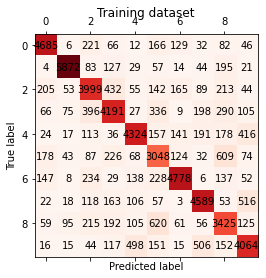

In [30]:

C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

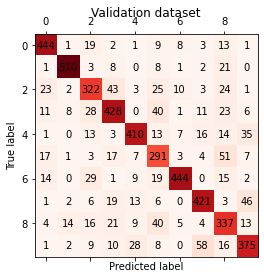

In [31]:

C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

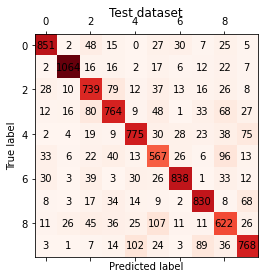

In [32]:

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
# Support Vector Machine
from sklearn import svm
predictor = svm.SVC(gamma='scale', C=1.0,decision_function_shape='ovr', kernel='rbf') 
start = time.time()
predictor.fit(x_train, y_train)  
end = time.time()
print("Training time:{}".format(end-start))

Training time:140.06872582435608


In [34]:

train_pred = predictor.predict(x_train)
valid_pred = predictor.predict(x_valid)
test_pred = predictor.predict(x_test)

In [35]:

acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

training dataset acc:0.9955636363636363


In [36]:

acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

Validation dataset acc:0.9802


In [37]:

acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

Testing dataset acc:0.9766


In [38]:
def class_accuracy(y_pred,y_true):  
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

acc = class_accuracy(train_pred,y_train)  
print(acc)
acc = class_accuracy(valid_pred,y_valid)  
print(acc)
acc = class_accuracy(test_pred,y_test)  
print(acc)

[0.9988901220865705, 0.9954853273137697, 0.9963702359346642, 0.9933679870944614, 0.9955240581872435, 0.9957678355501813, 0.9987129987129987, 0.9939056242382031, 0.9964379452568429, 0.9913966684971627]
[0.9864603481624759, 0.9944444444444445, 0.9732142857142857, 0.967391304347826, 0.9833333333333333, 0.9673202614379085, 0.9916492693110647, 0.9808429118773946, 0.9748549323017408, 0.9814814814814815]
[0.9918367346938776, 0.9903083700440528, 0.9748062015503876, 0.9673267326732673, 0.9816700610997964, 0.9730941704035875, 0.988517745302714, 0.9659533073929961, 0.9794661190965093, 0.9524281466798811]


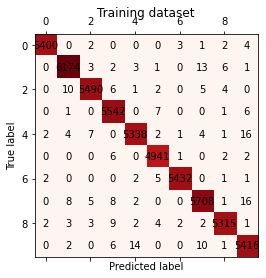

In [39]:

C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

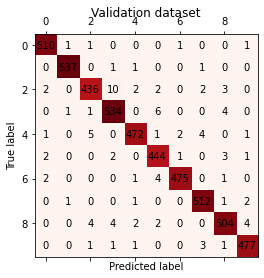

In [40]:

C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

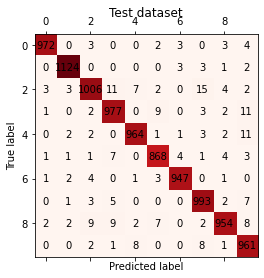

In [41]:

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:

joblib.dump(predictor,'./SVM.pkl')

['./SVM.pkl']

In [43]:
# Decision Tree
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=21, min_samples_split=3,random_state=40,)  
start = time.time()
classifier.fit(x_train, y_train)   
end = time.time()
print("Training time:{}".format(end-start))


Training time:1.1080288887023926


In [44]:

train_pred = classifier.predict(x_train)
valid_pred = classifier.predict(x_valid)
test_pred = classifier.predict(x_test)
acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

training dataset acc:0.9875272727272727
Validation dataset acc:0.8212
Testing dataset acc:0.8024


In [45]:
def class_accuracy(y_pred,y_true):  
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

acc = class_accuracy(train_pred,y_train)  
print(acc)
acc = class_accuracy(valid_pred,y_valid)  
print(acc)
acc = class_accuracy(test_pred,y_test)  
print(acc)

[0.9990751017388088, 0.9988713318284425, 0.9949183303085299, 0.9899623588456713, 0.9884371503170459, 0.9806529625151149, 0.9889685603971319, 0.9876371234546404, 0.973190851143607, 0.9710781621819513]
[0.8897485493230174, 0.9574074074074074, 0.7834821428571429, 0.7282608695652174, 0.8020833333333334, 0.7581699346405228, 0.8997912317327766, 0.9022988505747126, 0.723404255319149, 0.7551440329218106]
[0.8887755102040816, 0.9577092511013215, 0.810077519379845, 0.7693069306930693, 0.7780040733197556, 0.7130044843049327, 0.8423799582463466, 0.8210116731517509, 0.6981519507186859, 0.7155599603567889]


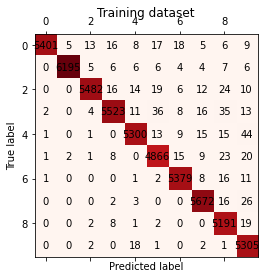

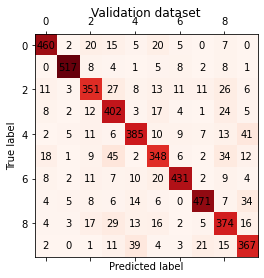

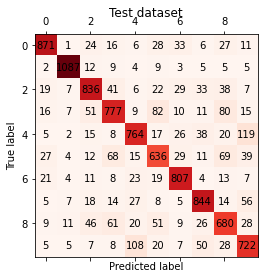

In [46]:

C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:

joblib.dump(classifier,'./Decision_Tree.pkl')

['./Decision_Tree.pkl']

In [48]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()  
start = time.time()
classifier.fit(x_train,y_train)  
end = time.time()
print("Training time:{}".format(end-start))

Training time:87.27047729492188


In [49]:

train_pred = classifier.predict(x_train)
valid_pred = classifier.predict(x_valid)
test_pred = classifier.predict(x_test)

acc = (y_train == train_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("training dataset acc:{}".format(acc_num/len(y_train)))

acc = (y_valid == valid_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Validation dataset acc:{}".format(acc_num/len(y_valid)))

acc = (y_test == test_pred)
acc_num = 0
for i in acc:
  if i:
    acc_num +=1
print("Testing dataset acc:{}".format(acc_num/len(y_test)))

training dataset acc:1.0
Validation dataset acc:0.9562
Testing dataset acc:0.9451


In [50]:
def class_accuracy(y_pred,y_true):  
  class_acc = [0,0,0,0,0,0,0,0,0,0]
  classnum = [0,0,0,0,0,0,0,0,0,0]
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in range(10):
    class_acc[i] = class_acc[i]/classnum[i]
  return class_acc

acc = class_accuracy(train_pred,y_train)  
print(acc)
acc = class_accuracy(valid_pred,y_valid)  
print(acc)
acc = class_accuracy(test_pred,y_test)  
print(acc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9748549323017408, 0.9944444444444445, 0.9397321428571429, 0.927536231884058, 0.96875, 0.9389978213507625, 0.9895615866388309, 0.9731800766283525, 0.9148936170212766, 0.9382716049382716]
[0.9826530612244898, 0.9850220264317181, 0.9341085271317829, 0.9376237623762376, 0.9480651731160896, 0.9271300448430493, 0.9718162839248434, 0.938715953307393, 0.9075975359342916, 0.9127849355797819]


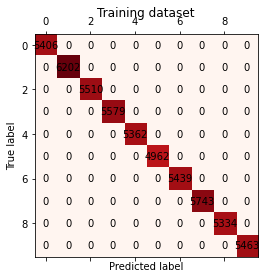

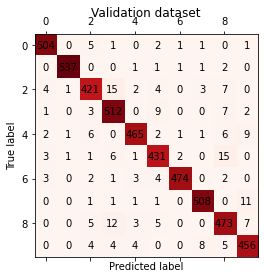

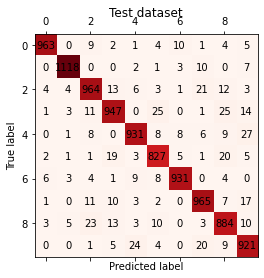

In [51]:

C = confusion_matrix(list(train_pred), list(y_train), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Training dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(valid_pred), list(y_valid), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Validation dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C = confusion_matrix(list(test_pred), list(y_test), labels=[0,1,2,3,4,5,6,7,8,9])
plt.matshow(C, cmap=plt.cm.Reds)
for i in range(len(C)):
    for j in range(len(C)):
        plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center')
plt.title('Test dataset')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:

joblib.dump(classifier,'./Random_Forest.pkl')

['./Random_Forest.pkl']

In [53]:
## Since the image after PCA dimensionality reduction cannot be restored to two dimensions, convolution operation cannot be carried out, so the convolutional neural network in task 4 cannot be realized.

In [ ]:
#Summary of classification Accuracy
nums = np.array([['18.936s','91.58%','92.66%','91.72%'],['0s','90.83%','92.06%','88.13%'],['159.76s','75.86%','77.8%','75.38%'],['137.85s','99.56%','98.05%','97.66%'],['1.065s','98.75%','82.12%','80.24%'],['87.302s','100%','96.1%','94.54%']])
colu = ['Training_time','Training_dataset','Validation_dataset','Testing_dataset']
index = ['SoftMax Regression','KNearest neighbors','Deep Neural Networks','Support Vector Machine','Decision Tree','Random Forest']
pd.DataFrame(data=nums,index = index,columns = colu)

,Training_time,Training_dataset,Validation_dataset,Testing_dataset
SoftMax Regression,18.936s,91.58%,92.66%,91.72%
KNearest neighbors,0s,90.83%,92.06%,88.13%
Deep Neural Networks,159.76s,75.86%,77.8%,75.38%
Support Vector Machine,137.85s,99.56%,98.05%,97.66%
Decision Tree,1.065s,98.75%,82.12%,80.24%
Random Forest,87.302s,100%,96.1%,94.54%
